In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [6]:
!mkdir visualization

A subdirectory or file visualization already exists.


In [2]:
model = tf.keras.models.load_model('model.h5')
model.summary();

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
activation_5 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97,

In [3]:
for layer in model.layers:
      if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        
        f_min, f_max = weights.min(), weights.max()
        
        filters = (weights - f_min) / (f_max - f_min)  
        print(layer.name, filters.shape)

        print(filters.shape[3])
        filter_cnt=1
        
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            print(filt)
        

conv2d_4 (3, 3, 1, 32)
32
[[[0.39671504]
  [0.1717608 ]
  [0.21715334]]

 [[0.90949816]
  [0.5939881 ]
  [0.78097254]]

 [[0.7010792 ]
  [0.80286694]
  [0.63067627]]]
[[[0.42089933]
  [0.30614805]
  [0.48108655]]

 [[0.44783658]
  [0.33110785]
  [0.7673952 ]]

 [[0.51875657]
  [0.8824891 ]
  [0.7823843 ]]]
[[[0.8286122 ]
  [0.8269462 ]
  [0.9603412 ]]

 [[0.8974172 ]
  [0.5820385 ]
  [0.9959376 ]]

 [[0.44007888]
  [0.79636174]
  [0.9364838 ]]]
[[[0.6314237 ]
  [0.74304616]
  [0.9141844 ]]

 [[0.7074526 ]
  [0.50673944]
  [0.28921488]]

 [[0.33043143]
  [0.54370475]
  [0.32166794]]]
[[[0.291031  ]
  [0.61755425]
  [0.799261  ]]

 [[0.78467673]
  [0.9157645 ]
  [0.32395303]]

 [[0.33475986]
  [0.46560106]
  [0.605561  ]]]
[[[0.38950014]
  [0.4674132 ]
  [0.23939472]]

 [[0.66176337]
  [0.35249606]
  [0.39054605]]

 [[0.26121598]
  [0.4401136 ]
  [0.6081204 ]]]
[[[0.18342617]
  [0.683016  ]
  [0.2624901 ]]

 [[0.545772  ]
  [0.25113088]
  [0.24285887]]

 [[0.85345095]
  [0.6745001 ]
  [0

   0.81355524 0.25741583]]]
[[[0.611029   0.35356313 0.73621374 0.683524   0.65828913 0.46099153
   0.6749559  0.6354205  0.8102082  0.62106687 0.44387016 0.80111676
   0.5277912  0.8414636  0.5844097  0.50473046 0.538256   0.62798095
   0.6111272  0.6201135  0.43939433 0.5424135  0.42041495 0.65945005
   0.54858434 0.8611794  0.6539299  0.432666   0.8367284  0.73843837
   0.3264314  0.45557684]
  [0.71051073 0.5298179  0.34453064 0.5215265  0.35902917 0.7613934
   0.8436275  0.48139316 0.39053142 0.66338456 0.5469264  0.68489593
   0.4350664  0.4732677  0.74991876 0.5771879  0.6722898  0.6412253
   0.45181343 0.39966986 0.5493535  0.58102316 0.65121865 0.59436977
   0.38584122 0.35346246 0.3876347  0.24357335 0.40924284 0.419492
   0.5811749  0.52319175]
  [0.17658603 0.06279383 0.19836217 0.3562405  0.37302083 0.43512723
   0.6823878  0.34571293 0.29174823 0.6762939  0.63005924 0.21559322
   0.255761   0.63926435 0.67051125 0.538286   0.56115216 0.8139952
   0.15161984 0.49271202 0.3

   0.37234703 0.3219953 ]]]
[[[0.3550363  0.30981305 0.38876906 0.564144   0.2375601  0.1783105
   0.6654482  0.60148156 0.18889588 0.665538   0.44002116 0.4096957
   0.6554319  0.5194623  0.5801624  0.24538651 0.648013   0.58499265
   0.70481807 0.63835204 0.5069162  0.5218032  0.57205904 0.33720127
   0.41889906 0.44020033 0.5683725  0.35878235 0.42349657 0.48046437
   0.54549915 0.5678173 ]
  [0.41808575 0.31051788 0.5783856  0.7047292  0.33583826 0.6131639
   0.40523022 0.46643692 0.28297698 0.35339114 0.7046367  0.20947818
   0.38514587 0.34759486 0.5872435  0.4045708  0.55976534 0.6364434
   0.6245872  0.48923665 0.3696791  0.32508904 0.42085454 0.5842676
   0.38823715 0.5036542  0.83209723 0.46447742 0.5054891  0.3741007
   0.6475535  0.6237282 ]
  [0.20963694 0.5182773  0.4365426  0.55940247 0.6601501  0.75330883
   0.24381134 0.52404034 0.22778253 0.49438053 0.41257626 0.50684994
   0.53491896 0.37675077 0.66761106 0.2519349  0.4258468  0.8004336
   0.74257904 0.37181604 0.429

   0.44211033 0.70141363]]]
[[[0.4238148  0.6813914  0.6146224  0.2378196  0.66213    0.2641139
   0.54991096 0.663846   0.4484489  0.4250558  0.34182632 0.32728085
   0.35973817 0.30811927 0.39146668 0.23587309 0.48234043 0.28971726
   0.56182724 0.7170334  0.37873048 0.33226776 0.36491573 0.66865826
   0.50423354 0.35007703 0.29890043 0.49348146 0.26058725 0.57645595
   0.55078185 0.43281755]
  [0.49366692 0.61650056 0.5367321  0.48494345 0.39108622 0.39119568
   0.83413726 0.4467655  0.58170944 0.6302039  0.34451368 0.5972752
   0.3978151  0.27815184 0.36720222 0.5188085  0.81185675 0.17107362
   0.5055345  0.6171931  0.27105087 0.58526665 0.45408177 0.56678146
   0.58010626 0.5078359  0.45802304 0.68537563 0.32275572 0.15870254
   0.7050125  0.3750885 ]
  [0.50120527 0.66020197 0.6497759  0.58053917 0.47543323 0.6682714
   0.8136277  0.6912557  0.6346172  0.5087036  0.2403211  0.638482
   0.33088827 0.35123467 0.6576689  0.52633107 0.20022267 0.5133392
   0.31426015 0.6067331  0.51

   0.44503754 0.37578893 0.50886405 0.49739417]]]
[[[0.35614806 0.2447191  0.5155393  0.57596016 0.2776738  0.18099241
   0.37725613 0.33511284 0.7249273  0.3495794  0.4093972  0.24400997
   0.41882977 0.6955491  0.3708491  0.63007355 0.65044177 0.43557614
   0.5372029  0.39108473 0.61106926 0.3408965  0.47834092 0.3185309
   0.38725725 0.5840889  0.53144157 0.53925127 0.34898782 0.29205325
   0.48051226 0.6910103  0.31776112 0.4122359  0.61095005 0.4482581
   0.6214258  0.399888   0.30381903 0.53232706 0.6573846  0.3684805
   0.7286742  0.30855936 0.48557958 0.28242823 0.4136498  0.50829756
   0.18885393 0.2551776  0.54004127 0.44884232 0.55599546 0.43719104
   0.3302853  0.58376604 0.2371979  0.42015272 0.6225566  0.5421857
   0.44176322 0.45576274 0.4951491  0.33493003]
  [0.4435593  0.3135265  0.5772404  0.6751072  0.3592823  0.28529945
   0.39320707 0.40383375 0.676781   0.67264146 0.47858453 0.5081613
   0.44748363 0.37789467 0.38686678 0.477055   0.24465498 0.5584921
   0.527180

   0.32421398 0.36202472 0.34618726 0.5448596 ]]]
[[[0.39462543 0.22720294 0.64551574 0.3800753  0.47575077 0.73471975
   0.23354188 0.5795518  0.59325254 0.30027163 0.30327967 0.34399563
   0.6599081  0.19969879 0.41696048 0.5185303  0.64603686 0.4439374
   0.3604897  0.60591525 0.2930468  0.43104178 0.65165913 0.35007954
   0.35582423 0.2391889  0.5107783  0.6735627  0.5635494  0.4066017
   0.5114351  0.43342838 0.49950254 0.42584157 0.47025147 0.38025358
   0.61838335 0.5251104  0.47201383 0.44428846 0.3304202  0.4335686
   0.38223773 0.44369435 0.32053518 0.69826853 0.39553207 0.37709528
   0.3861516  0.42280003 0.40883794 0.68124443 0.37640882 0.53358704
   0.55604273 0.30201742 0.50598514 0.63790214 0.64476544 0.63145006
   0.53140366 0.22676809 0.30561486 0.4695986 ]
  [0.35235888 0.5424553  0.34062228 0.68531525 0.41168654 0.726069
   0.36674199 0.35288772 0.6825269  0.47992793 0.5623302  0.23050833
   0.24374545 0.5066587  0.50834733 0.28582442 0.6231147  0.57837534
   0.25643

   0.56286544 0.5960855  0.49162987 0.24235786]]]
[[[0.46339148 0.54447794 0.6538743  0.5282028  0.63004    0.5635664
   0.58015394 0.51047856 0.49963093 0.283395   0.5564531  0.6595944
   0.27210534 0.5087009  0.39444208 0.2963548  0.23358868 0.41050595
   0.5189795  0.62483007 0.43541664 0.5477064  0.5254655  0.41344845
   0.47921413 0.5352411  0.5811608  0.7091017  0.27380726 0.5149465
   0.5595048  0.26729354 0.70952004 0.38376352 0.7015793  0.5658487
   0.66830695 0.65521777 0.41395622 0.3837459  0.35330048 0.4562264
   0.46701896 0.53819984 0.5275371  0.60411304 0.47939125 0.2857294
   0.70097995 0.35718232 0.56506824 0.62063307 0.68793297 0.43651512
   0.59855825 0.46789777 0.41872385 0.59187    0.38411835 0.45839024
   0.6611719  0.62935954 0.4950503  0.56430393]
  [0.6006528  0.54180914 0.4966562  0.6587954  0.30245763 0.2245215
   0.4818123  0.5429933  0.52099115 0.6944073  0.5882043  0.58940345
   0.5120093  0.6056122  0.44718397 0.41647577 0.51527923 0.61836517
   0.4934938

   0.50718355 0.3460845  0.5405924  0.5739279 ]]]
[[[0.5459104  0.55825156 0.553343   0.71140337 0.3364146  0.5775023
   0.6835502  0.3614726  0.52783906 0.51980394 0.5773914  0.36879548
   0.5723989  0.46748126 0.6462936  0.39480886 0.4593093  0.40421847
   0.45606843 0.63800186 0.46275577 0.2924643  0.44792    0.31316394
   0.4666575  0.5884371  0.5404641  0.5459887  0.5970057  0.3753385
   0.61638355 0.46278477 0.6848615  0.3210173  0.7217823  0.5194997
   0.5176782  0.46653682 0.651748   0.40933228 0.38544565 0.34634504
   0.64623475 0.59313613 0.4053221  0.43219528 0.46179155 0.45004302
   0.3434981  0.6702682  0.6610044  0.40612167 0.2204237  0.6071133
   0.47613895 0.49269632 0.6850298  0.32745555 0.33409482 0.5367186
   0.2903863  0.5516872  0.25324222 0.51533604]
  [0.63685334 0.44240502 0.45134    0.37911966 0.31976593 0.4434768
   0.6642784  0.38713124 0.54165614 0.39170873 0.47635788 0.41827485
   0.4089923  0.46848407 0.28733635 0.51022714 0.6261233  0.6271186
   0.5231592

   0.55208886 0.53538805 0.4895025  0.35305744]]]
[[[0.3268307  0.65032715 0.4788864  0.41963917 0.45797896 0.47308555
   0.27390894 0.4989446  0.5968486  0.27341667 0.38666984 0.40027332
   0.27097964 0.42643872 0.5886892  0.44437397 0.50764275 0.5498903
   0.4397987  0.4586783  0.2968029  0.2442193  0.5096951  0.66996735
   0.63529426 0.55003476 0.3799618  0.295347   0.6781596  0.59295094
   0.53001946 0.5012988  0.39058074 0.45918283 0.60955757 0.44853333
   0.42986572 0.5228372  0.6162902  0.5692267  0.5508805  0.26924506
   0.25641945 0.43235928 0.3804991  0.5313697  0.58102995 0.4643571
   0.640868   0.37657812 0.275416   0.49496678 0.29421225 0.24385968
   0.57154226 0.45459637 0.44454604 0.38019007 0.5275685  0.579
   0.57116294 0.6418255  0.30047375 0.6570218 ]
  [0.49674422 0.28117675 0.4463622  0.6862407  0.4451926  0.644569
   0.2563099  0.3138288  0.6339298  0.6603506  0.6407927  0.5343212
   0.36381325 0.36750755 0.6702189  0.27343333 0.48928714 0.38433903
   0.3571462  0

conv2d_4 (3, 3, 1, 32)
32


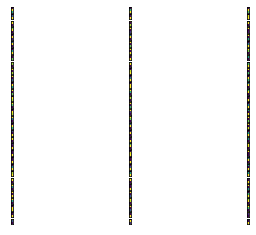

conv2d_5 (3, 3, 32, 32)
32


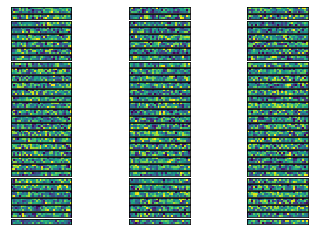

conv2d_6 (3, 3, 32, 64)
64


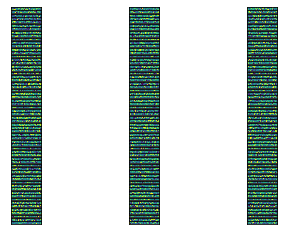

conv2d_7 (3, 3, 64, 64)
64


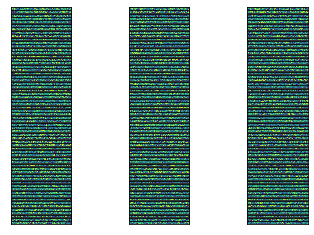

In [4]:
for layer in model.layers:
      if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        
        f_min, f_max = weights.min(), weights.max()
        
        filters = (weights - f_min) / (f_max - f_min)  
        print(layer.name, filters.shape)

        print(filters.shape[3])
        filter_cnt=1
        
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

[[1.]]
(1, 198, 198, 32)
32
(1, 198, 198, 32)
32
(1, 99, 99, 32)
32
(1, 97, 97, 32)
32
(1, 97, 97, 32)
32
(1, 48, 48, 32)
32
(1, 46, 46, 64)
64
(1, 46, 46, 64)
64

C:\Users\kabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide



(1, 23, 23, 64)
64
(1, 21, 21, 64)
64
(1, 21, 21, 64)
64
(1, 10, 10, 64)
64
(1, 6400)
(1, 64)
(1, 1)
(1, 1)


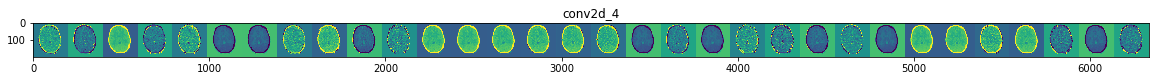

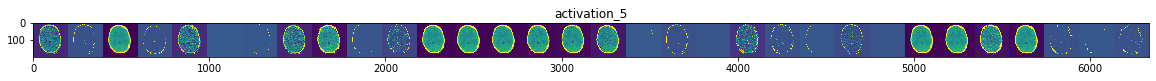

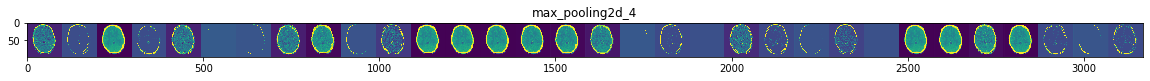

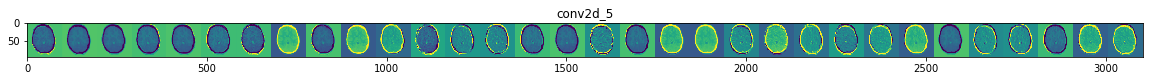

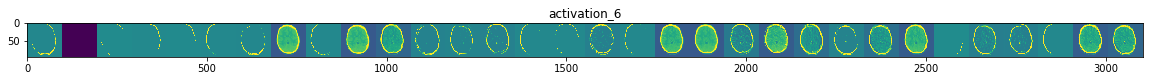

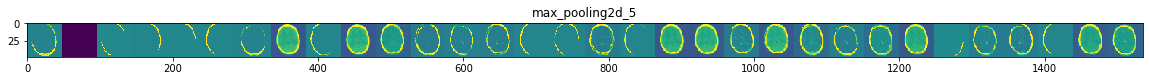

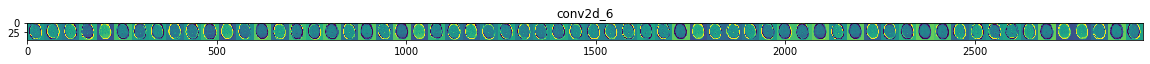

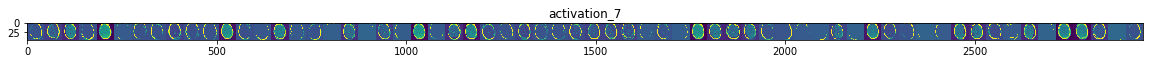

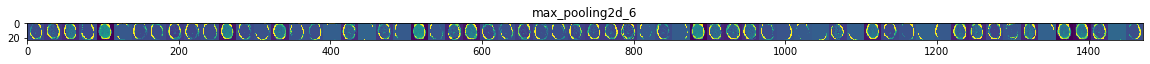

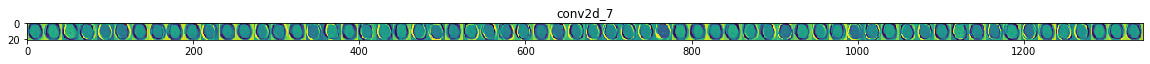

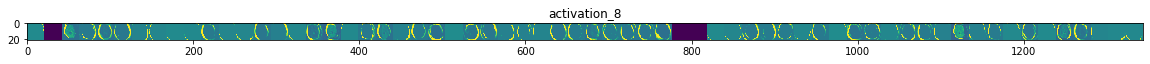

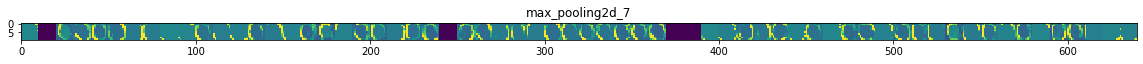

In [5]:
img_path = "test/normal-0.jpg" # test image
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
img = load_img(img_path, target_size=(200, 200))
img= cv2.imread(img_path,0)
img = cv2.resize(img,(200,200))
x   = np.array(img).reshape(-1,200,200,1)
print(model.predict(x))
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1] 
    size       = feature_map.shape[ 1]  
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features 
    print(n_features)
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )
    cv2.imwrite(f"visualization/{layer_name}.png",display_grid)


In [ ]:
img_path = "test/normal-0.jpg"

successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
img = load_img(img_path, target_size=(200, 200))
img= cv2.imread(img_path,0)
img = cv2.resize(img,(200,200))
x   = np.array(img).reshape(-1,200,200,1)
print(model.predict(x))
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1] 
    size       = feature_map.shape[ 1]  
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      plt.imshow(x)
      plt.show()